<h1 align="center">üö¢ Titanic Supervivencia üö¢</h1>


Por alumna Erika Monserrat Correa Hern√°ndez
 de Tecnolog√≠as para la Informaci√≥n en las Ciencias de la ENES MORELIA


* Contacto erikacorreahdezenes@gmail.com
*  https://www.linkedin.com/in/erika-monserrat-correa-hern%C3%A1ndez-6735a231b/
* GitHub https://github.com/eri2905

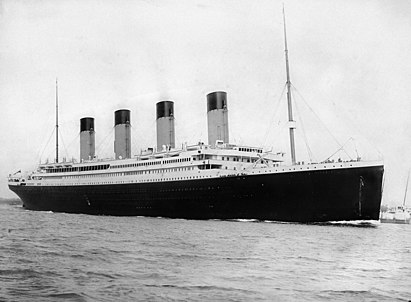
        

<h1 align="center">Significado de las columnas de nuestra base de datos</h1>

---


|           Columna      |    Descripci√≥n                                                                                                                         |
|:-------------|:-------------------------------------------------------------------------------------------------------------------------------------|
| idx          | √çndice secuencial de la fila; solo numeraci√≥n interna del dataset.                                                                   |
| survived     | Supervivencia: 1‚ÄØ=‚ÄØsobrevivi√≥, 0‚ÄØ=‚ÄØno sobrevivi√≥.                                                                                    |
| pclass       | Clase del boleto (proxy de nivel socio‚Äëecon√≥mico): 1‚ÄØ=‚ÄØPrimera, 2‚ÄØ=‚ÄØSegunda, 3‚ÄØ=‚ÄØTercera.                                            |
| sex          | Sexo registrado (female, male).                                                                                                      |
| age          | Edad en a√±os. Valores fraccionarios (<1‚ÄØa√±o) se muestran como decimales; edades estimadas terminan en ‚Äú.5‚Äù.                          |
| sibsp        | N√∫mero de hermanos/as o c√≥nyuge a bordo. Incluye medios‚Äëhermanos; excluye prometidos/as o amantes.                                   |
| parch        | N√∫mero de padres o hijos a bordo. Incluye hijastros y padres adoptivos; algunos menores con ni√±era tienen parch = 0.                 |
| fare         | Tarifa pagada por el pasaje (libras esterlinas de 1912).                                                                             |
| embarked     | Puerto de embarque: C = Cherburgo, Q = Queenstown, S = Southampton.                                                                  |
| class        | Nombre descriptivo de la clase de pasajero (First, Second, Third). Redundante con pclass, √∫til para lectura.                         |
| who          | Categor√≠a simplificada de persona: child, woman, man (derivada de age y sex).                                                       |
| adult_male   | Booleano (True/False) que indica si es un var√≥n adulto (‚â•18‚ÄØa√±os).                                                                   |
| deck         | Cubierta del camarote (letra inicial de Cabin); muchos valores faltan.                                                               |
| embark_town  | Ciudad de embarque: Cherbourg, Queenstown o Southampton.                                                                             |
| alive        | Versi√≥n textual de survived: Yes (sobrevivi√≥) o No (no sobrevivi√≥).                                                                  |
| alone        | Booleano que indica si viajaba sin familiares (True = viajaba solo; False = con al menos un familiar).                               |


<h1 align="center">Le√©mos nuestros Datos</h1>
Link de d√≥nde se descargaron los datos
https://www.kaggle.com/competitions/titanic/data

Correspondiente a los datos train.csv

---


In [1]:
# Cargamos nuestros datos
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [7]:
#Cargamos las bibliotecas necesarias
import numpy as np              # librer√≠a base para c√°lculos num√©ricos y arreglos
import pandas as pd             # manejo de datos tabulares (DataFrame)
import matplotlib.pyplot as plt # motor de gr√°ficos 2D
# import seaborn as sns           # capa de gr√°ficos estad√≠sticos con buen estilo


In [8]:
#Le√©mos nuestro Dataframe del titanic y analizamos nuestros datos
df_titanic =  pd.read_csv("titanic.csv");df_titanic

idx  survived  pclass     sex   age  sibsp  parch     fare embarked  \
0      0         0       3    male  22.0      1      0   7.2500        S   
1      1         1       1  female  38.0      1      0  71.2833        C   
2      2         1       3  female  26.0      0      0   7.9250        S   
3      3         1       1  female  35.0      1      0  53.1000        S   
4      4         0       3    male  35.0      0      0   8.0500        S   
..   ...       ...     ...     ...   ...    ...    ...      ...      ...   
886  886         0       2    male  27.0      0      0  13.0000        S   
887  887         1       1  female  19.0      0      0  30.0000        S   
888  888         0       3  female   NaN      1      2  23.4500        S   
889  889         1       1    male  26.0      0      0  30.0000        C   
890  890         0       3    male  32.0      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man        True  NaN  Southampton    no  False  
1     First  woman       False    C    Cherbourg   yes  False  
2     Third  woman       False  NaN  Southampton   yes   True  
3     First  woman       False    C  Southampton   yes  False  
4     Third    man        True  NaN  Southampton    no   True  
..      ...    ...         ...  ...          ...   ...    ...  
886  Second    man        True  NaN  Southampton    no   True  
887   First  woman       False    B  Southampton   yes   True  
888   Third  woman       False  NaN  Southampton    no  False  
889   First    man        True    C    Cherbourg   yes   True  
890   Third    man        True  NaN   Queenstown    no   True  

[891 rows x 16 columns]

<h1 align="center">Objetivo</h1>

---


Queremos encontrar el patr√≥n de supervivencia de la cat√°strofe
Por ejemplo: para sobrevivir, se ten√≠a que ser ni√±o de entre 3 meses y 5 a√±os o mujer de
entre 23 y 32 a√±os; pudi√©ndose salvar tambi√©n los hombres mayores de 50 a√±os que
embarcaron en Cherbourg.


## Limpieza del Dataframe

Queremos limpiar el dataframe para que nuestro modelo y predicciones sean mejores,vamos a quitar el **idx** porque no ser√° necesario para encontar el patr√≥n de supervivencia, la **class** porque es redundante y ya tenemos el **pclass** en n√∫mero y la columna de **deck** ya que tenemos m√°s del 20% de datos faltantes y el rellenarlo sesgar√≠a nuestro modelo y la de **alive** ya que dice lo mismo que **survived** pero en letra,tambi√©n borramos la de **adult_male**, ya que solo indica si es un hombre y ya lo tenemos en **who**,tambi√©n borro **embark** porque es la incial de la ciudad de embarcaci√≥n **embark_down**.

In [ ]:
#Hacemos una lista de las columnas que queremos eliminar
columnas_a_eliminar = ['idx','class','deck','alive','adult_male','embarked']
#Eliminamos con drop e indicamos la lista de columnas a eliminar
df_titanic =df_titanic.drop(columns=columnas_a_eliminar)

In [ ]:
#Imprimimos el dataframe
df_titanic

survived  pclass     sex   age  sibsp  parch     fare    who  \
0           0       3    male  22.0      1      0   7.2500    man   
1           1       1  female  38.0      1      0  71.2833  woman   
2           1       3  female  26.0      0      0   7.9250  woman   
3           1       1  female  35.0      1      0  53.1000  woman   
4           0       3    male  35.0      0      0   8.0500    man   
..        ...     ...     ...   ...    ...    ...      ...    ...   
886         0       2    male  27.0      0      0  13.0000    man   
887         1       1  female  19.0      0      0  30.0000  woman   
888         0       3  female   NaN      1      2  23.4500  woman   
889         1       1    male  26.0      0      0  30.0000    man   
890         0       3    male  32.0      0      0   7.7500    man   

     embark_town  alone  
0    Southampton  False  
1      Cherbourg  False  
2    Southampton   True  
3    Southampton  False  
4    Southampton   True  
..           ...    ...  
886  Southampton   True  
887  Southampton   True  
888  Southampton  False  
889    Cherbourg   True  
890   Queenstown   True  

[891 rows x 10 columns]

## Sustituimos valores nulos

| Situaci√≥n t√≠pica                                                                                         | ¬øMedia o mediana?           | Por qu√©                                                                                                                                                   |
|----------------------------------------------------------------------------------------------------------|-----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Distribuci√≥n **sim√©trica** (‚âà normal) y sin valores extremos importantes                                 | **Media**                   | La media es el mejor estimador de la tendencia central cuando los datos est√°n equilibrados: minimiza el error cuadr√°tico medio y preserva la varianza.    |
| Distribuci√≥n **asim√©trica** (sesgo a la derecha o izquierda) o con **outliers**                         | **Mediana**                 | La mediana es robusta: no cambia si a√±ades o quitas unos pocos valores extremos. Evitas ‚Äúarrastrar‚Äù el centro de la distribuci√≥n hacia los outliers.     |
| Variable **discreta** con pocos valores √∫nicos (p.‚ÄØej.‚ÄØ0/1, conteos peque√±os)                             | **Mediana** (o **moda**)    | La media puede producir n√∫meros ‚Äúirreales‚Äù (2.7 hijos). La mediana conserva interpretabilidad.                                                             |
| Muestras **peque√±as** (n‚ÄØ<‚ÄØ30)                                                                            | **Mediana**                 | Con pocos datos, un solo outlier altera mucho la media; la mediana es m√°s estable.                                                                         |
| Necesitas **conservar la varianza** para t√©cnicas sensibles (p.‚ÄØej.‚ÄØPCA) y los datos son razonablemente limpios | **Media** (o imputaci√≥n m√∫ltiple) | La media mantiene la dispersi√≥n; la mediana tiende a ‚Äúapilar‚Äù valores.                                                                                     |


In [ ]:
#Buscamos que columnas tienen datos faltantes
columnas = df_titanic.columns
#Hacemos un for para recorrer cada una de las columnas y ver si hacen falta datos  con comando isnull()
for columna in columnas:
    datos_faltan = df_titanic[columna].isnull().sum()
    if datos_faltan >= 1:
        print(f"La columna '{columna}' tiene {datos_faltan} datos faltantes.")

La columna 'age' tiene 177 datos faltantes.
La columna 'embark_town' tiene 2 datos faltantes.


La primer columna con datos nulos es Age y queremos llenar los datos faltantes para hacer un mejor an√°lisis, queremos elegir entre la media y la mediana.
Para elegir queremos ver si hay valores at√≠picos o no, por lo que graficaremos una gr√°fica de caja y bigotes.

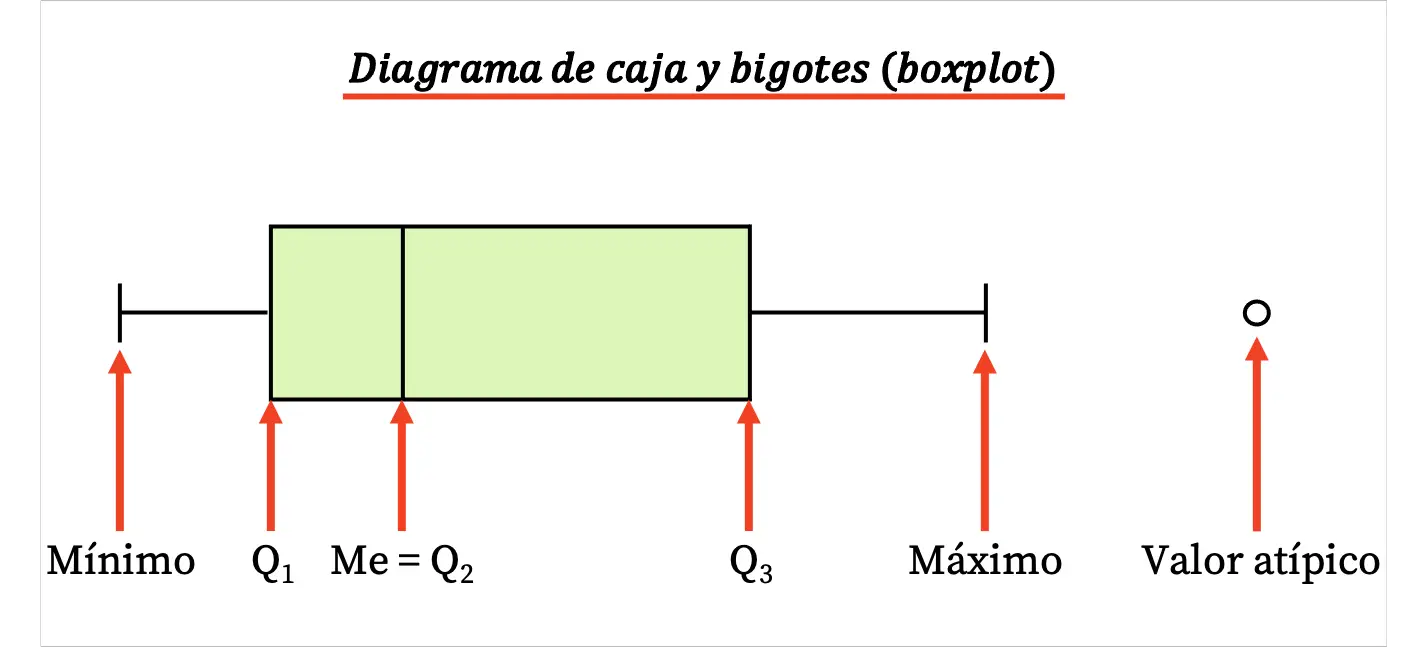

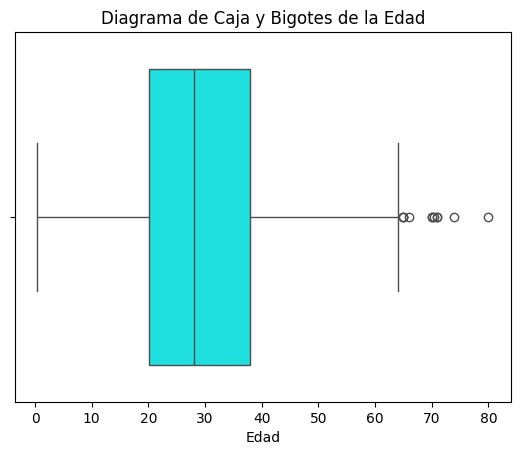

In [ ]:
#Importamos seaborn que tiene la gr√°fica de bigotes incluida
import seaborn as sns
#Eliminamos filas con valores nulos en 'age'
dropna_age = df_titanic.dropna(subset=['age'])
#Creamos un diagrama de caja y bigotes para 'age'
sns.boxplot(data=dropna_age, x='age',color='cyan')
plt.xlabel('Edad')
plt.title('Diagrama de Caja y Bigotes de la Edad')
plt.show()

Como en la gr√°fica se muestra que hay valores at√≠picos optamos por elegir la mediana ya que esta es m√°s robusta ante estos valores  y no se ve afectada por estos como el promedio(media) ya que proporciona una medida m√°s representativa del centro de la distribuci√≥n.

In [ ]:
#Sacamos la mediana de la columna Age
mediana = df_titanic['age'].median()
print(mediana)
#Sustituimos la mediana en cada uno de los vcalores nulos de la columna
df_titanic['age'].fillna(mediana,inplace=True)

28.0


C:\Users\erika\AppData\Local\Temp\ipykernel_13084\3431397258.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(mediana,inplace=True)


La segunda columna con datos faltantes es **embark_town**, como solo hay 2 datos falatantes optaremos por rellenar esos valores con el valor que m√°s se repite para no afetar nuestro modelo y mantendremos la proporci√≥n de nuestros datos.


In [ ]:
#Sacamos la moda de embark_town de
moda2 = df_titanic['embark_town'].mode()[0]
#print(moda2)
df_titanic['embark_town'].fillna(moda2, inplace=True)

C:\Users\erika\AppData\Local\Temp\ipykernel_13084\3078487117.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(moda2, inplace=True)


In [ ]:
df_titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [ ]:
#Verificamos que nuestro dataframe ya non tenga valores nulos
columnas = df_titanic.columns
#Hacemos un for para recorrer cada una de las columnas y ver si hacen falta datos  con comando isnull()
for columna in columnas:
    datos_faltan = df_titanic[columna].isnull().sum()
    if datos_faltan == 0:
        print(f"La columna '{columna}' tiene {datos_faltan} datos faltantes.")

La columna 'survived' tiene 0 datos faltantes.
La columna 'pclass' tiene 0 datos faltantes.
La columna 'sex' tiene 0 datos faltantes.
La columna 'age' tiene 0 datos faltantes.
La columna 'sibsp' tiene 0 datos faltantes.
La columna 'parch' tiene 0 datos faltantes.
La columna 'fare' tiene 0 datos faltantes.
La columna 'who' tiene 0 datos faltantes.
La columna 'embark_town' tiene 0 datos faltantes.
La columna 'alone' tiene 0 datos faltantes.


In [ ]:
#Guardo el csv ya limpio y sin datos nulos
df_titanic.to_csv('titaniceri.csv', index=False)

In [ ]:
#Seleccionamos solo a los sobrevivientes y obtenemos las estadisticas descriptivas
#para encontrar patrones para nuestra regla
sobrevivientes = df_titanic[df_titanic['survived'] == 1]

for columna in columnas:
    print(f"Estad√≠sticas de la columna {columna}:")
    print(sobrevivientes[columna].describe(), "\n")

Estad√≠sticas de la columna survived:
count    342.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: survived, dtype: float64 

Estad√≠sticas de la columna pclass:
count    342.000000
mean       1.950292
std        0.863321
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: pclass, dtype: float64 

Estad√≠sticas de la columna sex:
count        342
unique         2
top       female
freq         233
Name: sex, dtype: object 

Estad√≠sticas de la columna age:
count    342.000000
mean      28.291433
std       13.764425
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64 

Estad√≠sticas de la columna sibsp:
count    342.000000
mean       0.473684
std        0.708688
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: sibsp, dtype: float64 

Estad√≠s

In [ ]:
#En promedio los sobrevivientes pertenecian a la clase:
pclass = sobrevivientes['pclass'].mean().astype(int)
print(f'En promedio los sobrevientes fueron de la clase: {pclass}')

#Contamos la cantidad de hombres y mujeres que sobrevivieron del titanic
tipo_sexo = sobrevivientes['sex'].value_counts()
print(f"La cantidad de sobrevivientes respecto al sexo es:",tipo_sexo)

#promedio de la edad de los sobrevivientes
promedio_age = sobrevivientes['age'].mean().astype(int)
print(f'En promedio la edad que ten√≠an los pasajeros sobrevivientes es de: {promedio_age}')

#La mayor√≠a de los sobrevivientes viajaban con la siguiente cantidad hermanos/conyuges
moda_sibsp = sobrevivientes['sibsp'].mode()[0]
print(f'La mayor√≠a sobrevivientes viajaban con : {moda_sibsp} hermanos/conyuges')

#La mayoria de los sobrevivientes viajaban y ten√≠an parentezco de padres e hij@
parch = sobrevivientes['parch'].mode()[0]
print(f'La mayor√≠a sobrevivientes con padres-hijos: {parch}')

#Lo que pagaron en promedio los sobrevevivientes
fare = sobrevivientes['fare'].mean()
print(f"Precio por el que pagaron su boleto los sobrevivientes en promedio: {fare}")


#Queremos saber los diferentes tipos de datos en la columna who
whos = sobrevivientes['who'].unique()
print(f'Tipo de datos en whos: {whos}')

#La mayor√≠a de los sobrevivientes eran:
who = sobrevivientes['who'].mode()[0]
print(f"La mayor√≠a de los sobrevivientes eran: {who}s" )

#La cantidad de sobrevivientes por clase de who
clase_who = sobrevivientes['who'].value_counts()
print(f"Cantidad de sobrevivientes por clase de persona : {clase_who}")

#Cantidad de sobrevivientes por Ciudad de embarcaci√≥n:
moda_town = sobrevivientes['embark_town'].mode()[0]
print(f"La mayor√≠a de los sobrevivientes abordaron en la Ciudad de: {moda_town}")
town = sobrevivientes['embark_town'].unique()
print(f'Diferentes ciudades en las que embarcaron: {town}')
embark_town = sobrevivientes['embark_town'].value_counts()
print(f"Cantidad de sobrevivientes por ciudad de embarcaci√≥n : {embark_town}")

#La mayor√≠a de los sobrevivientes viajaban solos o acompa√±ados:
alone = sobrevivientes['alone'].value_counts()
print(f"Cantidad de sobrevivientes que viajaban:{alone}")



En promedio los sobrevientes fueron de la clase: 1
La cantidad de sobrevivientes respecto al sexo es: sex
female    233
male      109
Name: count, dtype: int64
En promedio la edad que ten√≠an los pasajeros sobrevivientes es de: 28
La mayor√≠a sobrevivientes viajaban con : 0 hermanos/conyuges
La mayor√≠a sobrevivientes con padres-hijos: 0
Precio por el que pagaron su boleto los sobrevivientes en promedio: 48.39540760233918
Tipo de datos en whos: ['woman' 'child' 'man']
La mayor√≠a de los sobrevivientes eran: womans
Cantidad de sobrevivientes por clase de persona : who
woman    205
man       88
child     49
Name: count, dtype: int64
La mayor√≠a de los sobrevivientes abordaron en la Ciudad de: Southampton
Diferentes ciudades en las que embarcaron: ['Cherbourg' 'Southampton' 'Queenstown']
Cantidad de sobrevivientes por ciudad de embarcaci√≥n : embark_town
Southampton    219
Cherbourg       93
Queenstown      30
Name: count, dtype: int64
Cantidad de sobrevivientes que viajaban:alone
False  

In [ ]:
# An√°lisis de la tarifa pagada dentro de cada clase
tarifa_clase = sobrevivientes.groupby('pclass')['fare'].mean()
print(f'Promedio de tarifa pagada por clase:{tarifa_clase}')

Promedio de tarifa pagada por clase:pclass
1    95.608029
2    22.055700
3    13.694887
Name: fare, dtype: float64


In [ ]:
#porcentaje de supervivencia por clase who
sobrevivientes_por_clase = df_titanic[df_titanic['survived'] == 1]['who'].value_counts()
#Calculamos el porcentaje de supervivencia por clase.
porcentaje_por_clase = (sobrevivientes_por_clase / 342) * 100
print(porcentaje_por_clase)

who
woman    59.941520
man      25.730994
child    14.327485
Name: count, dtype: float64


# Creamos Regla

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non

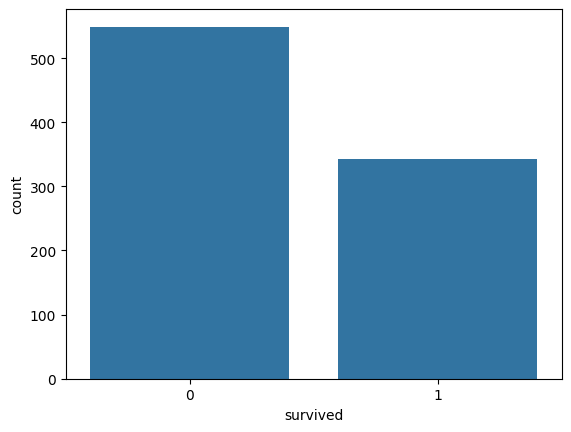

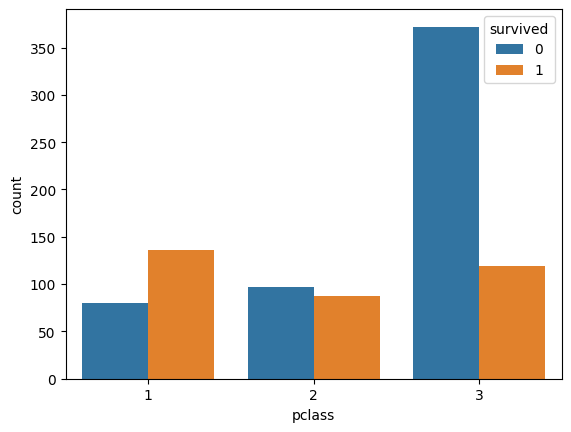

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#Calculamos estadisticas para analizar los datos
print(df_titanic.describe())
print(df_titanic.info())

# Graficamos
sns.countplot(x='survived', data=df_titanic)
plt.show()

sns.countplot(x='pclass', hue='survived', data=df_titanic)
plt.show()



In [ ]:
def supervivencia1(pclass, sex, age, sibsp, parch, fare, embark_town,alone):

    if sex == 'female':
        if pclass < 3:  # Mayor tasa de supervivencia en mujeres de clase alta
            return 1
        elif age < 50 and sibsp < 3:  # Mujeres j√≥venes con menos familiares tienen m√°s posibilidades
            return 1
    elif sex == 'male':
        if age < 10 and pclass == 1:  # Ni√±os en primera clase
            return 1
        elif alone and fare > 50:  # Hombres solos que pagaron m√°s
            return 1
    if embark_town in ['Cherbourg', 'Queenstown'] and fare > 80:  # Pasajeros que embarcaron en C o Q con alta tarifa
        return 1
    if pclass == 3 and sex == 'male':
        return 0
    return 0


In [ ]:
#Ejemplo de si sobrevivio alguien con la regla
predecir_supervivencia = supervivencia1(pclass=3, sex='female', age=21, sibsp=0, parch=0, fare=100, embark_town='Cherbourg', alone=True)
print(f"Predicci√≥n de supervivencia: {predecir_supervivencia}")

Predicci√≥n de supervivencia: 1


In [ ]:
#Aplicamos la funci√≥n de predicci√≥n a cada fila del DataFrame.
df_titanic['prediccion'] = df_titanic.apply(lambda x: supervivencia1(
    pclass=x['pclass'], sex=x['sex'], age=x['age'], sibsp=x['sibsp'],
    parch=x['parch'], fare=x['fare'], embark_town=x['embark_town'], alone=x['alone']), axis=1)

#Calculamos el n√∫mero total de predicciones correctas.
correctas = (df_titanic['prediccion'] == df_titanic['survived']).sum()

#Calculamos la exactitud: n√∫mero de predicciones correctas dividido por el total de predicciones.
exactitud = (correctas / len(df_titanic)) * 100

print(f"Exactitud del modelo supervivencia 1: {exactitud:.2f}%")


Exactitud del modelo supervivencia 1: 79.01%


# Regla 2

sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


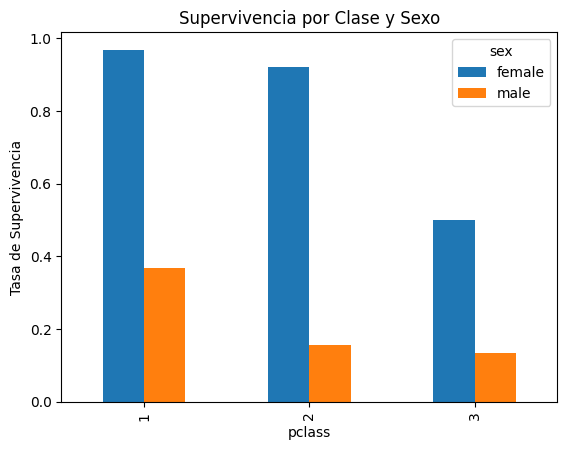

family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: survived, dtype: float64


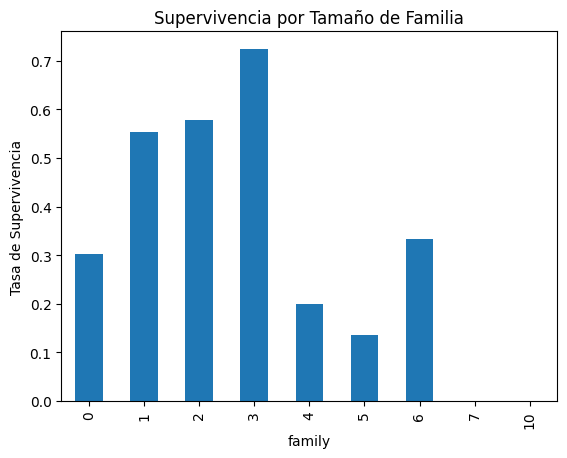

In [ ]:
#Analisis
#Sobrevvivientes por Clase y Sexo
classandsexo = df_titanic.groupby(['pclass', 'sex'])['survived'].mean()
print(classandsexo.unstack())
classandsexo.unstack().plot(kind='bar')
plt.title('Supervivencia por Clase y Sexo')
plt.ylabel('Tasa de Supervivencia')
plt.show()

# Creamos una nueva variable de Total de Familiares a Bordo
df_titanic['family'] = df_titanic['sibsp'] + df_titanic['parch']

#Supervivencia por Tama√±o de Familia
supervivencia_family = df_titanic.groupby('family')['survived'].mean()
print(supervivencia_family)
supervivencia_family.plot(kind='bar')
plt.title('Supervivencia por Tama√±o de Familia')
plt.ylabel('Tasa de Supervivencia')
plt.show()

In [ ]:
#Definimos la regla 2 de acuerdo al analisis
def supervivencia2(columnx):
    if columnx['sex'] == 'female':
        if columnx['pclass'] < 3 or columnx['fare'] > 50:
            return 1
    if columnx['sex'] == 'male' and columnx['age'] < 10 and columnx['pclass'] == 1:
            return 1
    if columnx['family'] == 1 or columnx['family'] == 2:
        return 1
    return 0
# Resultados supervivencia 2
df_titanic['prediction'] = df_titanic.apply(supervivencia2, axis=1)

#Calculamos  la exactitud
accuracy = (df_titanic['prediction'] == df_titanic['survived']).mean() * 100
print(f"Exactitud del modelo supervivencia 2: {accuracy:.2f}%")

Exactitud del modelo supervivencia 2: 73.29%


In [ ]:
def supervivencia_combinada(columnx2):
    if columnx2['sex'] == 'female':
        if columnx2['pclass'] < 3 or columnx2['fare'] > 50:
            return 1
        elif columnx2['age'] < 50 and columnx2['sibsp'] < 3:
            return 1
    elif columnx2['sex'] == 'male':
        if columnx2['age'] < 10 and columnx2['pclass'] == 1:
            return 1
        elif columnx2.get('alone', False) and columnx2['fare'] > 50:
            return 1

    if columnx2.get('family', 0) == 1 or columnx2.get('family', 0) == 2:
        return 1
    if columnx2.get('embarked', '') in ['C', 'Q'] and columnx2['fare'] > 80:
        return 1

    return 0

df_titanic['family'] = df_titanic['sibsp'] + df_titanic['parch']
df_titanic['alone'] = df_titanic['family'] == 0

df_titanic['Prediction'] = df_titanic.apply(supervivencia_combinada, axis=1)

accuracy = (df_titanic['Prediction'] == df_titanic['survived']).mean() * 100
print(f"Exactitud supervivencia combinada: {accuracy:.2f}%")


Exactitud supervivencia combinada: 73.51%


###  2. ¬øCu√°les son los porcentajes de supervivencia y fallecimiento de ni√±os, mujeres y hombres?


In [ ]:
#Sacamos el porcentaje total de sobrevivientes, nomalize= True saca la proporci√≥n en vez de la cantidad
porcentaje_sobrevivientes = sobrevivientes['who'].value_counts(normalize=True) * 100
print( f"El porcentaje de sobrevivientes es: {porcentaje_sobrevivientes}")

#Filtramos los fallecidos
fallecidos = df_titanic[df_titanic['survived'] == 0 ]
porcentaje_fallecidos= fallecidos['who'].value_counts(normalize=True) * 100
print(f"El porcentaje de fallecimiento es: {porcentaje_fallecidos}")

El porcentaje de sobrevivientes es: who
woman    59.941520
man      25.730994
child    14.327485
Name: proportion, dtype: float64
El porcentaje de fallecimiento es: who
man      81.785064
woman    12.021858
child     6.193078
Name: proportion, dtype: float64


### 3.-Comparen en un gr√°fico el promedio de edad de los fallecidos contra los sobrevivientes, para cada uno de los puertos de embarque diferentes.

In [ ]:
"""#Promedio de edad de fallecidos
promedio_age_f = df_titanic[df_titanic['survived'] == 0 ]['age'].mean().astype(int)
print(promedio_age_f)

#Promedio de edad de sobrevivientes
promedio_age_s = df_titanic[df_titanic['survived'] == 1]['age'].mean().astype(int)
print(promedio_age_s)"""


"#Promedio de edad de fallecidos\npromedio_age_f = df_titanic[df_titanic['survived'] == 0 ]['age'].mean().astype(int)\nprint(promedio_age_f)\n\n#Promedio de edad de sobrevivientes\npromedio_age_s = df_titanic[df_titanic['survived'] == 1]['age'].mean().astype(int)\nprint(promedio_age_s)"

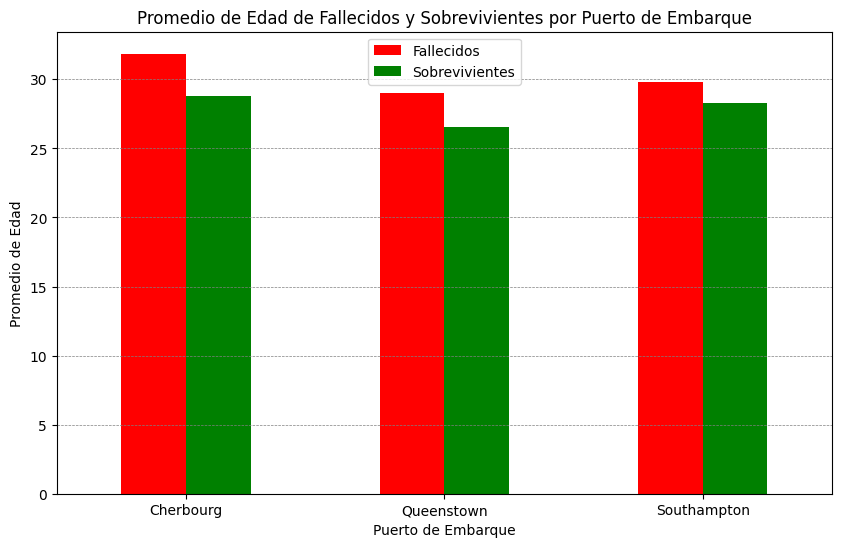

In [ ]:
# Calculamos los promedios de edad para fallecidos y sobrevivientes por puerto de embarque
promedio_age_fands= df_titanic.groupby(['embark_town', 'survived'])['age'].mean().unstack()

# Gr√°ficamos
promedio_age_fands.plot(kind='bar', figsize=(10, 6), color= ['red','green'])
plt.title('Promedio de Edad de Fallecidos y Sobrevivientes por Puerto de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Promedio de Edad')
plt.xticks(rotation=0)
plt.legend(["Fallecidos", "Sobrevivientes"])
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='grey')
plt.show()


### 4. ¬øSi viajabas solo ten√≠as m√°s probabilidad de sobrevivir?

Cantidad de sobrevivientes que viajaban:alone
False    179
True     163
Name: count, dtype: int64


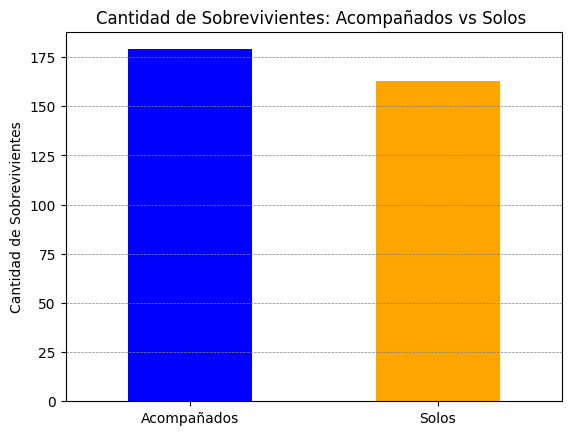

In [ ]:
#La mayor√≠a de los sobrevivientes viajaban solos o acompa√±ados:
alone = sobrevivientes['alone'].value_counts()
print(f"Cantidad de sobrevivientes que viajaban:{alone}")
datos_alone = list(sobrevivientes['alone'])
# Gr√°ficamos de barras directamente desde los conteos
alone.plot(kind='bar', color=['blue', 'orange'])
plt.title('Cantidad de Sobrevivientes: Acompa√±ados vs Solos ')
plt.xticks(ticks=[0, 1], labels=['Acompa√±ados', 'Solos'], rotation=0)  # Ajustando las etiquetas del eje X
plt.ylabel('Cantidad de Sobrevivientes')
plt.xlabel('')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='grey')
plt.show()


In [ ]:
# Calculamos la tasa de supervivencia promedio para pasajeros solos y acompa√±ados
sobrevivir_alone = sobrevivientes['alone'].value_counts(normalize=True) * 100
print(sobrevivir_alone)


alone
False    52.339181
True     47.660819
Name: proportion, dtype: float64


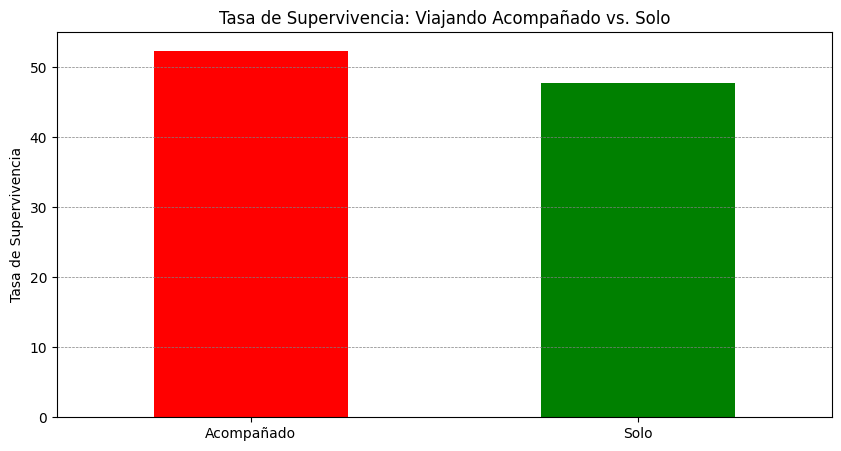

In [ ]:
# Creamos un gr√°fico de barras para visualizar la tasa de supervivencia
plt.figure(figsize=(10, 5))
sobrevivir_alone.plot(kind='bar', color=['red', 'green'])
plt.title('Tasa de Supervivencia: Viajando Acompa√±ado vs. Solo')
plt.xlabel('')
plt.ylabel('Tasa de Supervivencia')
plt.xticks(ticks=[0, 1], labels=['Acompa√±ado', 'Solo'], rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='gray')
# A√±adimos el porcentaje en las barras
plt.show()


### 5.-¬øCu√°l es el puerto de embarque con mayor capacidad econ√≥mica?


Promedio del precio del boleto por puerto de embarque:
embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.243651
Name: fare, dtype: float64
El puerto de embarque con mayor capacidad econ√≥mica (basado en el precio promedio del boleto) es: Cherbourg


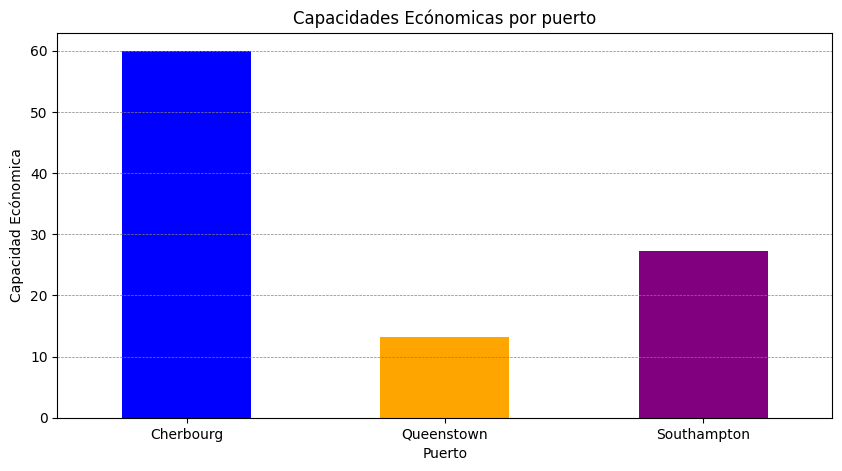

In [ ]:
#Agrupamos por puerto de embarque y tarifa y calculamos el promedio del precio del boleto
embarked_and_fare= df_titanic.groupby('embark_town')['fare'].mean()

#Encontramos el puerto con el mayor capacidad economica
embarked_fare_max = embarked_and_fare.idxmax()

print(f"\nPromedio del precio del boleto por puerto de embarque:\n{embarked_and_fare}")
print(f"El puerto de embarque con mayor capacidad econ√≥mica (basado en el precio promedio del boleto) es: {embarked_fare_max}")

# Creamos un gr√°fico de barras para visualizar la capacidad economica por tipo de embarque
plt.figure(figsize=(10, 5))
embarked_and_fare.plot(kind='bar', color=['blue', 'orange','purple'])
plt.title('Capacidades Ec√≥nomicas por puerto')
plt.xlabel('Puerto')
plt.ylabel('Capacidad Ec√≥nomica')
plt.xticks(ticks=[0, 1,2], labels=['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='gray')
plt.show()


### 6. ¬øA quienes embarcaron en Cherbourg les combino pagar tarifas m√°s altas?

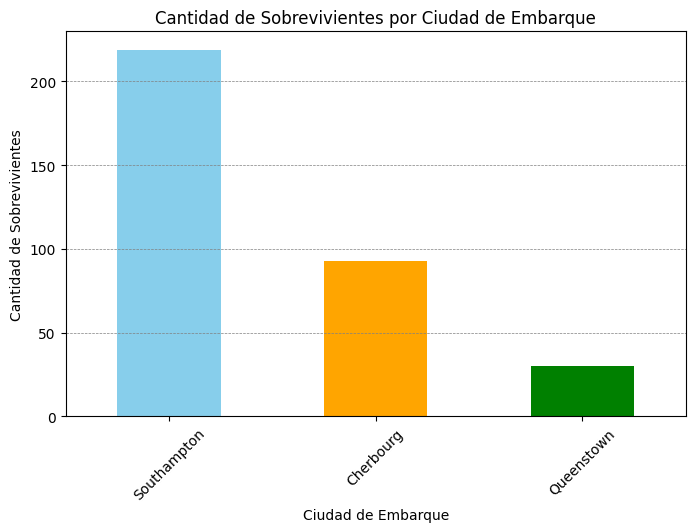

In [ ]:
# Sacamos la cantidad de sobrevivientes por ciudad y gr√°ficamos
sobrevivientes_por_ciudad = sobrevivientes['embark_town'].value_counts()

# Crear el gr√°fico de barras
plt.figure(figsize=(8, 5))
sobrevivientes_por_ciudad.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Cantidad de Sobrevivientes por Ciudad de Embarque')
plt.xlabel('Ciudad de Embarque')
plt.ylabel('Cantidad de Sobrevivientes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')
plt.show()

embark_town
Cherbourg      79.720926
Queenstown     13.182227
Southampton    39.916514
Name: fare, dtype: float64


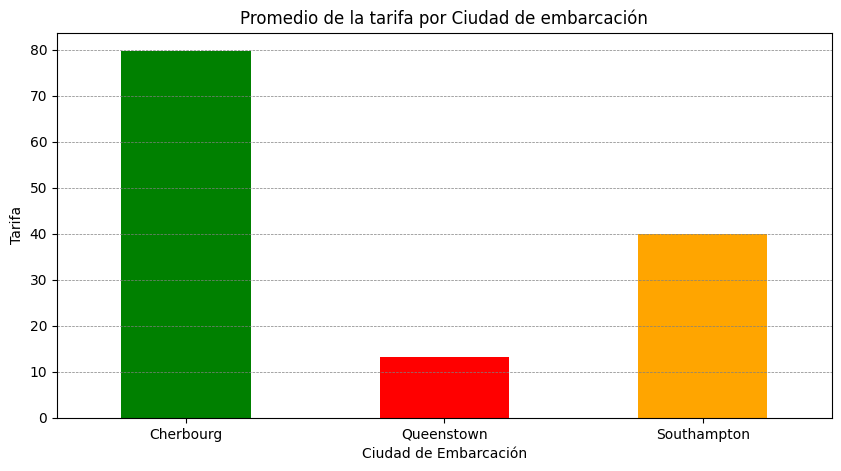

In [ ]:
# Calculamos el promedio de la tarifa por Ciudad de emparcaci√≥n
town_fare = sobrevivientes.groupby('embark_town')['fare'].mean()
print(town_fare)
# Creamos un gr√°fico de barras para visualizar la tasa de supervivencia
plt.figure(figsize=(10, 5))
town_fare.plot(kind='bar', color=['green', 'red','orange'])
plt.title('Promedio de la tarifa por Ciudad de embarcaci√≥n')
plt.xlabel('Ciudad de Embarcaci√≥n')
plt.ylabel('Tarifa')
plt.xticks(ticks=[0, 1,2], labels=['Cherbourg','Queenstown','Southampton' ], rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='gray')
plt.show()

No les combino pagar m√°s porque los que m√°s sobrevivieron fueron los de la Ciudad de Cherbourg

### 7. ¬øCu√°l es el puerto de embarque con mayor cantidad total de fallecimientos?

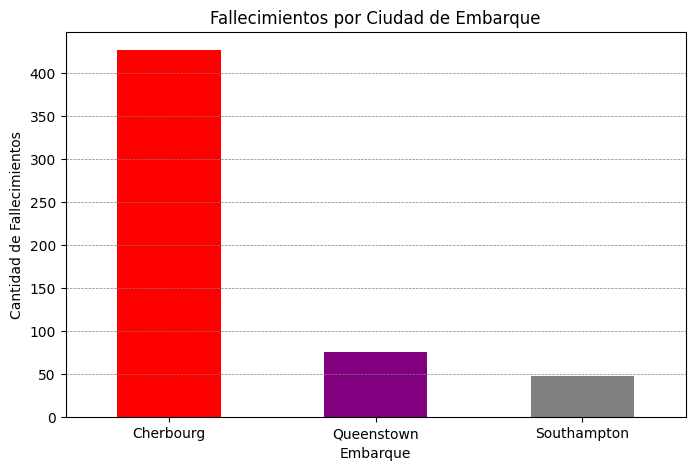

In [ ]:
#Cantidad de fallecidos por embarque
embark_f = fallecidos['embark_town'].value_counts()
embark_f
# Creamos un gr√°fico de barras para visualizar la cantidad de fallecidos por embarque
plt.figure(figsize=(8, 5))
embark_f.plot(kind='bar',color=['red', 'purple','grey'])
plt.title('Fallecimientos por Ciudad de Embarque')
plt.xlabel('Embarque')
plt.ylabel('Cantidad de Fallecimientos')
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg','Queenstown','Southampton'], rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y', color='gray')
plt.show()

Cherbourg tuvo la cantidad m√°s alta de fallecimientos

### 8. ¬øLa edad influy√≥ para NO sobrevivir?


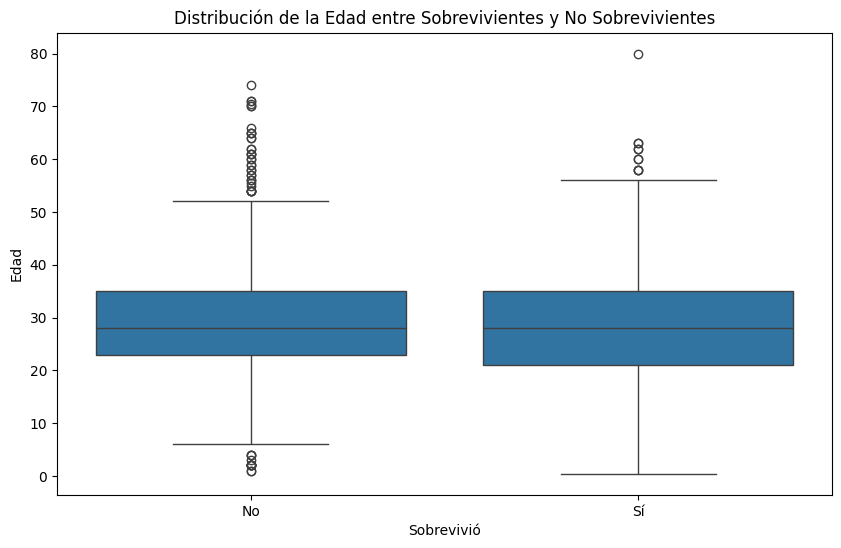

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df_titanic)
plt.title('Distribuci√≥n de la Edad entre Sobrevivientes y No Sobrevivientes')
plt.xlabel('Sobrevivi√≥')
plt.ylabel('Edad')
plt.xticks([0, 1], ['No', 'S√≠'])
plt.show()

Describiendo estad√≠stica de las cajas de Bigote:

**Caja central:** La caja representa el rango intercuart√≠lico (IQR), que abarca desde el primer cuartil (Q1, el 25%) hasta el tercer cuartil (Q3, el 75%). Esto significa que la mitad de los datos se encuentra dentro de la caja.

**L√≠nea dentro de la caja:** La l√≠nea dentro de la caja marca la mediana (Q2), que es el valor central de los datos.

**"Bigotes" o l√≠neas verticales:** Se extienden desde la caja hasta el valor m√°ximo y m√≠nimo dentro de un l√≠mite que t√≠picamente es 1.5 veces el IQR por encima del tercer cuartil y por debajo del primer cuartil. Los puntos fuera de esos l√≠mites se consideran valores at√≠picos o "outliers".

**C√≠rculos (puntos):** Representan los valores at√≠picos mencionados anteriormente, los cuales son puntos de datos que caen fuera del rango de los "bigotes".

Del gr√°fico se puede observar que la mediana de la edad de los sobrevivientes parece ser un poco m√°s baja que la mediana de la edad de los no sobrevivientes, lo cual podr√≠a sugerir que los m√°s j√≥venes tuvieron ligeramente mejores tasas de supervivencia. Adem√°s, ambos grupos tienen valores at√≠picos en el rango de edad m√°s alto, lo que indica que hubo pasajeros significativamente mayores que el promedio que tanto sobrevivieron como no sobrevivieron.

La dispersi√≥n de las edades entre los no sobrevivientes parece ser ligeramente mayor, dado que la caja y los "bigotes" se extienden m√°s, lo que podr√≠a sugerir una mayor variabilidad en las edades de los no sobrevivientes comparado con los sobrevivientes. Sin embargo, para hacer afirmaciones m√°s s√≥lidas se requerir√≠an an√°lisis estad√≠sticos adicionales.




